In [205]:
# import
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import sklearn 

# Modeling process
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, accuracy_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


I have two data sources as referenced on the README file. The first Reposotry contains basic information about every match. The second one has detailed information for selected matches. In this section, I will join the data from the first Repository and the second Repository. This will enable me to have an in depth analysis on the players and more accurate results on the ML part. 
The steps for this is as follows : 
1- cbind the target fetures from the second Repo into one Dataset
2- cbind the dataset of the extra fetures with the first Repo dataset 
3- Clean the final dataset

In [3]:
p2 = pd.read_csv('../data/charting-m-stats-Overview.csv')
p2 

,match_id,player,set,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,bk_pts,bp_saved,return_pts,return_pts_won,winners,winners_fh,winners_bh,unforced,unforced_fh,unforced_bh
0,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,Total,69,2,1,32,25,37,21,5,4,63,36,28,10,16,16,6,9
1,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,Total,63,2,2,41,20,22,7,12,4,69,23,14,8,4,26,15,9
2,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,1,26,2,0,15,10,11,6,2,1,18,13,10,3,5,6,2,4
3,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,1,18,0,0,11,3,7,2,3,0,26,10,4,2,2,10,7,3
4,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,2,24,0,0,10,9,14,8,1,1,26,10,9,3,6,6,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,2,1,40,3,0,22,13,18,10,7,6,27,12,10,4,3,13,6,7
19736,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,1,2,30,3,2,22,15,8,4,4,3,23,15,9,4,2,9,3,4
19737,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,2,2,23,2,0,14,6,9,2,4,1,30,11,6,1,3,13,8,5
19738,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,1,3,30,2,2,13,10,17,7,3,2,17,12,9,4,3,5,1,2


In [4]:
overview_p2 = pd.read_csv('../data/charting-m-stats-Overview.csv')
overview_p2 = overview_p2.loc[overview_p2['set'] == 'Total', :]
overview_p2




,match_id,player,set,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,bk_pts,bp_saved,return_pts,return_pts_won,winners,winners_fh,winners_bh,unforced,unforced_fh,unforced_bh
0,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,Total,69,2,1,32,25,37,21,5,4,63,36,28,10,16,16,6,9
1,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,Total,63,2,2,41,20,22,7,12,4,69,23,14,8,4,26,15,9
8,19780125-M-Pepsi_Grand_Slam-SF-Brian_Gottfried...,1,Total,55,0,1,32,21,23,9,9,5,49,14,11,7,4,31,9,21
9,19780125-M-Pepsi_Grand_Slam-SF-Brian_Gottfried...,2,Total,49,0,2,31,25,18,10,1,0,55,25,15,8,7,21,7,12
14,19800705-M-Wimbledon-F-John_Mcenroe-Bjorn_Borg,1,Total,180,12,3,111,75,69,44,14,10,196,65,69,28,29,102,29,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19717,20220712-M-Bastad-R32-Emil_Ruusuvuori-Dominic_...,2,Total,98,7,3,69,45,29,14,12,8,89,40,31,12,12,44,27,14
19724,20220706-M-Wimbledon-QF-Nick_Kyrgios-Cristian_...,1,Total,114,17,4,81,59,33,14,9,8,88,32,62,11,4,42,21,17
19725,20220706-M-Wimbledon-QF-Nick_Kyrgios-Cristian_...,2,Total,88,2,5,63,43,25,13,6,3,114,41,44,16,8,33,15,13
19732,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,1,Total,87,8,5,50,35,37,16,11,7,80,44,25,10,7,23,11,7


Merge the other datasets from the same Repo 

In [5]:
df2 = pd.read_csv('../data/charting-m-stats-ReturnDepth.csv')
#Return- w_ReturenSh,w_ReturenD,w_ReturenVD
# Returen Outcome- w_ReturenWon
col = df2.columns.tolist()
df2 = df2.rename_axis([str(x) for x in range(8)]).reset_index()
df2 = df2.set_axis(col+[str(x) for x in range(8)], axis=1)
df2.drop([str(x) for x in range(8)], axis=1, inplace=True)
df2[['tourney_date', 'sm', 'tourney_name', 'sm2', 'player1', 'player2']
    ] = df2['match_id'].str.split('-', 6, expand=True)
# df2.loc[:,['player1','player2']]=df2.loc[:,['player1','player2']].applymap(lambda x: x.replace('_',' ') ) #for multiple columns
df2 = df2.loc[df2['row'] == 'Total', :]
# So I want to change the value of the column player from 1 to the value of the name in column player1
# 1,16,17 are the index
# for i in range(len(df2)) :
#     df2.iloc[i,1] = np.where(df2.iloc[i,1] == 1, df2.iloc[i,16], df2.iloc[i,17])
df2.drop(['player1', 'player2', 'sm', 'sm2', 'tourney_name',
         'tourney_date', 'unforced'], axis=1, inplace=True)
df2.rename(columns={'row': 'set'}, inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5198 entries, 0 to 93017
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       5198 non-null   object
 1   player         5198 non-null   int64 
 2   set            5198 non-null   object
 3   returnable     5198 non-null   int64 
 4   shallow        5198 non-null   int64 
 5   deep           5198 non-null   int64 
 6   very_deep      5198 non-null   int64 
 7   err_net        5198 non-null   int64 
 8   err_deep       5198 non-null   int64 
 9   err_wide       5198 non-null   int64 
 10  err_wide_deep  5198 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 487.3+ KB


In [6]:
df4 = pd.read_csv('../data/charting-m-stats-ShotDirection.csv')
col = df4.columns.tolist()
df4 = df4.rename_axis([str(x) for x in range(12)]).reset_index()
df4 = df4.set_axis(col+[str(x) for x in range(12)], axis=1)
df4.drop([str(x) for x in range(12)], axis=1, inplace=True)
df4[['tourney_date', 'sm', 'tourney_name', 'sm2', 'player1', 'player2']
    ] = df4['match_id'].str.split('-', 6, expand=True)
# df4.loc[:,['player1','player2']]=df4.loc[:,['player1','player2']].applymap(lambda x: x.replace('_',' ') ) #for multiple columns
df4 = df4.loc[df4['row'] == 'Total', :]
# So I want to change the value of the column player from 1 to the value of the name in column player1
# 1,16,17 are the index
# for i in range(len(df4)) :
#     df4.iloc[i,1] = np.where(df4.iloc[i,1] == 1, df4.iloc[i,12], df4.iloc[i,13])
df4.rename(columns={'row': 'set'}, inplace=True)

df4.drop(['player1', 'player2', 'sm', 'sm2', 'tourney_name',
         'tourney_date'], axis=1, inplace=True)
df4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5201 entries, 0 to 20610
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       5201 non-null   object
 1   player         5201 non-null   int64 
 2   set            5201 non-null   object
 3   crosscourt     5201 non-null   int64 
 4   down_middle    5201 non-null   int64 
 5   down_the_line  5201 non-null   int64 
 6   inside_out     5201 non-null   int64 
 7   inside_in      5201 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 365.7+ KB


In [7]:

overview_p2 = pd.merge(overview_p2,
                       df2,
                       on=['match_id', 'set', 'player'],
                       how="right")
overview_p2 = pd.merge(overview_p2,
                       df4,
                       on=['match_id', 'set', 'player'],
                       how="right")

overview_p2.drop_duplicates(inplace=True)
overview_p2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 5248
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_id        5193 non-null   object 
 1   player          5193 non-null   int64  
 2   set             5193 non-null   object 
 3   serve_pts       5186 non-null   float64
 4   aces            5186 non-null   float64
 5   dfs             5186 non-null   float64
 6   first_in        5186 non-null   float64
 7   first_won       5186 non-null   float64
 8   second_in       5186 non-null   float64
 9   second_won      5186 non-null   float64
 10  bk_pts          5186 non-null   float64
 11  bp_saved        5186 non-null   float64
 12  return_pts      5186 non-null   float64
 13  return_pts_won  5186 non-null   float64
 14  winners         5186 non-null   float64
 15  winners_fh      5186 non-null   float64
 16  winners_bh      5186 non-null   float64
 17  unforced        5186 non-null   f

In [8]:
print(overview_p2.columns.tolist())


['match_id', 'player', 'set', 'serve_pts', 'aces', 'dfs', 'first_in', 'first_won', 'second_in', 'second_won', 'bk_pts', 'bp_saved', 'return_pts', 'return_pts_won', 'winners', 'winners_fh', 'winners_bh', 'unforced', 'unforced_fh', 'unforced_bh', 'returnable', 'shallow', 'deep', 'very_deep', 'err_net', 'err_deep', 'err_wide', 'err_wide_deep', 'crosscourt', 'down_middle', 'down_the_line', 'inside_out', 'inside_in']


In [9]:
overview_p1 = overview_p2.copy()
overview_p2_w = overview_p2.copy()
overview_p1_w = overview_p2.copy()
overview_cl= overview_p2.copy()
overview_p2


,match_id,player,set,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,...,very_deep,err_net,err_deep,err_wide,err_wide_deep,crosscourt,down_middle,down_the_line,inside_out,inside_in
0,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,Total,69.0,2.0,1.0,32.0,25.0,37.0,21.0,...,12.0,0.0,1.0,0.0,0.0,87,43,19,22,0
1,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,Total,63.0,2.0,2.0,41.0,20.0,22.0,7.0,...,10.0,1.0,0.0,2.0,0.0,79,52,17,26,2
2,19780125-M-Pepsi_Grand_Slam-SF-Brian_Gottfried...,1,Total,55.0,0.0,1.0,32.0,21.0,23.0,9.0,...,16.0,3.0,0.0,0.0,0.0,88,33,20,13,0
3,19780125-M-Pepsi_Grand_Slam-SF-Brian_Gottfried...,2,Total,49.0,0.0,2.0,31.0,25.0,18.0,10.0,...,9.0,0.0,1.0,0.0,0.0,132,45,19,10,2
4,19800705-M-Wimbledon-F-John_Mcenroe-Bjorn_Borg,1,Total,180.0,12.0,3.0,111.0,75.0,69.0,44.0,...,25.0,20.0,11.0,7.0,0.0,43,25,40,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,20220712-M-Bastad-R32-Emil_Ruusuvuori-Dominic_...,2,Total,98.0,7.0,3.0,69.0,45.0,29.0,14.0,...,18.0,0.0,3.0,0.0,0.0,141,102,25,46,3
5245,20220706-M-Wimbledon-QF-Nick_Kyrgios-Cristian_...,1,Total,114.0,17.0,4.0,81.0,59.0,33.0,14.0,...,0.0,0.0,3.0,0.0,0.0,44,99,14,34,0
5246,20220706-M-Wimbledon-QF-Nick_Kyrgios-Cristian_...,2,Total,88.0,2.0,5.0,63.0,43.0,25.0,13.0,...,0.0,0.0,0.0,0.0,0.0,66,94,4,27,1
5247,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,1,Total,87.0,8.0,5.0,50.0,35.0,37.0,16.0,...,15.0,0.0,0.0,0.0,0.0,131,60,35,39,7


In [10]:
first_repo_data = pd.read_csv('../data/atp_matches_2005-2022.csv')
first_repo_data.head()


/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,0,2005-1536,Madrid Masters,Hard,48,M,20051017,1,103812,NaN,...,27.0,20.0,6.0,8.0,2.0,5.0,42.0,827.0,63.0,621.0
1,1,2005-1536,Madrid Masters,Hard,48,M,20051017,2,102845,NaN,...,24.0,16.0,9.0,7.0,5.0,9.0,33.0,1005.0,41.0,836.0
2,2,2005-1536,Madrid Masters,Hard,48,M,20051017,3,102450,NaN,...,22.0,15.0,20.0,9.0,1.0,4.0,26.0,1120.0,28.0,1115.0
3,3,2005-1536,Madrid Masters,Hard,48,M,20051017,4,104076,NaN,...,32.0,22.0,25.0,12.0,4.0,8.0,55.0,678.0,29.0,1090.0
4,4,2005-1536,Madrid Masters,Hard,48,M,20051017,5,103971,NaN,...,21.0,13.0,6.0,6.0,2.0,5.0,45.0,771.0,30.0,1070.0


One important thing here is that as we see the players information in the second repo are on diffrent rows whereas on the first they are in one row. Another problem is that in the first repo we have the winner info and the loser info denoted by 
w & l. Therefore we have to match player 1 & 2 names into winner_name and loser_name and the same for the rest. Since sometime player1 is the winner and sometime player2 is the winner I solve this issue by creating two datasets. 
The first one is where the first player is the winner and add a new column 'Label' with a value of 1. The second dataset if player2 is the winner with a label of value 0

The columns that I will add from the second repo datasets: 
The overview dataset :  ['winners_fh','winners_bh','unforced_fh','unforced_bh','return_pts','return_pts_won']


The data cleaning proccess for the second repo datasets is the same for each dataset : 
split the match_id to get the players names and rename other fetures to merge the datasets based on the names and the common fetures such as aces (This is because some players can play againest each other multiple times)

In [11]:
first_repo_data.columns.tolist()


['Unnamed: 0',
 'tourney_id',
 'tourney_name',
 'surface',
 'draw_size',
 'tourney_level',
 'tourney_date',
 'match_num',
 'winner_id',
 'winner_seed',
 'winner_entry',
 'winner_name',
 'winner_hand',
 'winner_ht',
 'winner_ioc',
 'winner_age',
 'loser_id',
 'loser_seed',
 'loser_entry',
 'loser_name',
 'loser_hand',
 'loser_ht',
 'loser_ioc',
 'loser_age',
 'score',
 'best_of',
 'round',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced',
 'winner_rank',
 'winner_rank_points',
 'loser_rank',
 'loser_rank_points']

In [12]:
overview_p2[['tourney_date', 'sm', 'tourney_name', 'sm2', 'player1',
             'player2']] = overview_p2['match_id'].str.split('-', 6, expand=True)
overview_p2['tourney_date'] = overview_p2['tourney_date'].apply(
    lambda x: int(x))
overview_p2 = overview_p2.loc[overview_p2['tourney_date'] > 20000000, :]
overview_p2 = overview_p2[(overview_p2['player'] == 2)]
overview_p2['l_1stIn'] = overview_p2['first_in']
overview_p2['l_1stWon'] = overview_p2['first_won']
overview_p2['l_2ndWon'] = overview_p2['second_won']
overview_p2['l_ace'] = overview_p2['aces']
overview_p2['l_winners_fh'] = overview_p2['winners_fh']
overview_p2['l_winners_bh'] = overview_p2['winners_bh']
overview_p2['l_unforced_fh'] = overview_p2['unforced_fh']
overview_p2['l_unforced_bh'] = overview_p2['unforced_bh']
overview_p2['l_return_pts_faced'] = overview_p2['return_pts']
overview_p2['l_return_pts_won'] = overview_p2['return_pts_won']
overview_p2['l_return_depth_very_deep'] = overview_p2['very_deep']
overview_p2['l_return_depth_shallow'] = overview_p2['shallow']
overview_p2['l_return_depth_deep'] = overview_p2['deep']
overview_p2['l_return_depth_err_net'] = overview_p2['err_net']
overview_p2['l_return_depth_err_deep'] = overview_p2['err_deep']
overview_p2['l_return_depth_err_wide'] = overview_p2['err_wide']
overview_p2['l_return_depth_wide_deep'] = overview_p2['err_wide_deep']
overview_p2['l_shot_Direction_crosscourt'] = overview_p2['crosscourt']
overview_p2['l_shot_Direction_down_middle'] = overview_p2['down_middle']
overview_p2['l_shot_Direction_down_the_line'] = overview_p2['down_the_line']
overview_p2['l_shot_Direction_inside_out'] = overview_p2['inside_out']
overview_p2['l_shot_Direction_inside_in'] = overview_p2['inside_in']
overview_p2.drop(overview_p2.columns.to_list()[1:37], axis=1, inplace=True)
overview_p2.rename(columns={'player1': 'winner_name',
                   'player2': 'loser_name'}, inplace=True)
overview_p2.loc[:, ['winner_name', 'loser_name']] = overview_p2.loc[:, [
    'winner_name', 'loser_name']].applymap(lambda x: x.replace('_', ' '))  # for multiple columns
print(overview_p2.columns.tolist())
print(overview_p2.info())


['match_id', 'winner_name', 'loser_name', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_ace', 'l_winners_fh', 'l_winners_bh', 'l_unforced_fh', 'l_unforced_bh', 'l_return_pts_faced', 'l_return_pts_won', 'l_return_depth_very_deep', 'l_return_depth_shallow', 'l_return_depth_deep', 'l_return_depth_err_net', 'l_return_depth_err_deep', 'l_return_depth_err_wide', 'l_return_depth_wide_deep', 'l_shot_Direction_crosscourt', 'l_shot_Direction_down_middle', 'l_shot_Direction_down_the_line', 'l_shot_Direction_inside_out', 'l_shot_Direction_inside_in']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257 entries, 99 to 5248
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        2257 non-null   object 
 1   winner_name                     2257 non-null   object 
 2   loser_name                      2257 non-null   object 
 3   l_1stIn                         2254 non-null

In [13]:
overview_p1[['tourney_date', 'sm', 'tourney_name', 'sm2', 'player1',
             'player2']] = overview_p1['match_id'].str.split('-', 6, expand=True)
# df.rename(columns = {'first_in':'l_1stIn', 'first_won':'l_1stWon','second_won' : 'l_2ndWon', 'aces' : 'l_ace'}, inplace = True)
overview_p1['tourney_date'] = overview_p1['tourney_date'].apply(
    lambda x: int(x))
overview_p1 = overview_p1.loc[overview_p1['tourney_date'] > 20000000, :]
overview_p1 = overview_p1[(overview_p1['set'] == 'Total')
                          & (overview_p1['player'] == 1)]
# df[df['l_1stIn' , 'l_1stWon','l_2ndWon' , 'l_ace']] = df['first_in', 'first_won','second_won' , 'aces' ]
overview_p1['w_1stIn'] = overview_p1['first_in']
overview_p1['w_1stWon'] = overview_p1['first_won']
overview_p1['w_2ndWon'] = overview_p1['second_won']
overview_p1['w_ace'] = overview_p1['aces']
overview_p1['w_winners_fh'] = overview_p1['winners_fh']
overview_p1['w_winners_bh'] = overview_p1['winners_bh']
overview_p1['w_unforced_fh'] = overview_p1['unforced_fh']
overview_p1['w_unforced_bh'] = overview_p1['unforced_bh']
overview_p1['w_return_pts_faced'] = overview_p1['return_pts']
overview_p1['w_return_pts_won'] = overview_p1['return_pts_won']
overview_p1['w_return_depth_very_deep'] = overview_p1['very_deep']
overview_p1['w_return_depth_shallow'] = overview_p1['shallow']
overview_p1['w_return_depth_deep'] = overview_p1['deep']
overview_p1['w_return_depth_err_net'] = overview_p1['err_net']
overview_p1['w_return_depth_err_deep'] = overview_p1['err_deep']
overview_p1['w_return_depth_err_wide'] = overview_p1['err_wide']
overview_p1['w_return_depth_wide_deep'] = overview_p1['err_wide_deep']
overview_p1['w_shot_Direction_crosscourt'] = overview_p1['crosscourt']
overview_p1['w_shot_Direction_down_middle'] = overview_p1['down_middle']
overview_p1['w_shot_Direction_down_the_line'] = overview_p1['down_the_line']
overview_p1['w_shot_Direction_inside_out'] = overview_p1['inside_out']
overview_p1['w_shot_Direction_inside_in'] = overview_p1['inside_in']
overview_p1.drop(overview_p1.columns.to_list()[1:37], axis=1, inplace=True)
overview_p1.rename(columns={'player1': 'winner_name',
                   'player2': 'loser_name'}, inplace=True)
overview_p1.loc[:, ['winner_name', 'loser_name']] = overview_p1.loc[:, [
    'winner_name', 'loser_name']].applymap(lambda x: x.replace('_', ' '))  # for multiple columns
overview_p1
print(overview_p1.columns.tolist())
print(overview_p1.info())


['match_id', 'winner_name', 'loser_name', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_ace', 'w_winners_fh', 'w_winners_bh', 'w_unforced_fh', 'w_unforced_bh', 'w_return_pts_faced', 'w_return_pts_won', 'w_return_depth_very_deep', 'w_return_depth_shallow', 'w_return_depth_deep', 'w_return_depth_err_net', 'w_return_depth_err_deep', 'w_return_depth_err_wide', 'w_return_depth_wide_deep', 'w_shot_Direction_crosscourt', 'w_shot_Direction_down_middle', 'w_shot_Direction_down_the_line', 'w_shot_Direction_inside_out', 'w_shot_Direction_inside_in']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 98 to 5247
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        2258 non-null   object 
 1   winner_name                     2258 non-null   object 
 2   loser_name                      2258 non-null   object 
 3   w_1stIn                         2254 non-null

In [14]:
overview_clean = pd.merge(overview_p1,
                          overview_p2,
                          on=['winner_name', 'loser_name', 'match_id'],
                          how="outer")

player1_merged = pd.merge(first_repo_data,
                          overview_clean,
                          on=['l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_ace', 'winner_name',
                              'loser_name', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_ace'],
                          how="right")
print(player1_merged.info())
# player1_merged = player1_merged.dropna(subset=['l_bpSaved'])
player1_merged.reset_index(inplace=True)
# first player wins so label=1
winner_player1 = np.ones(player1_merged.shape[0])
player1_merged['label'] = winner_player1
# print(player1_merged.info())
# display(player1_merged.head())

player1_merged.to_csv('../data/first-ATP.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      323 non-null    float64
 1   tourney_id                      323 non-null    object 
 2   tourney_name                    323 non-null    object 
 3   surface                         323 non-null    object 
 4   draw_size                       323 non-null    float64
 5   tourney_level                   323 non-null    object 
 6   tourney_date                    323 non-null    float64
 7   match_num                       323 non-null    float64
 8   winner_id                       323 non-null    float64
 9   winner_seed                     227 non-null    object 
 10  winner_entry                    27 non-null     object 
 11  winner_name                     2258 non-null   object 
 12  winner_hand                     32

In [15]:
sum(player1_merged['w_return_depth_err_wide'].isna()) 
# len(player1_merged['w_return_depth_err_wide'])

4

In [16]:
# overview_p2_w = pd.read_csv('../data/charting-m-stats-Overview.csv')


In [17]:
overview_p2_w[['tourney_date', 'sm', 'tourney_name', 'sm2', 'player1',
               'player2']] = overview_p2_w['match_id'].str.split('-', 6, expand=True)
overview_p2_w['tourney_date'] = overview_p2_w['tourney_date'].apply(
    lambda x: int(x))
overview_p2_w = overview_p2_w.loc[overview_p2_w['tourney_date'] > 20000000, :]
overview_p2_w = overview_p2_w[(overview_p2_w['set'] == 'Total') & (
    overview_p2_w['player'] == 1)]
overview_p2_w['l_1stIn'] = overview_p2_w['first_in']
overview_p2_w['l_1stWon'] = overview_p2_w['first_won']
overview_p2_w['l_2ndWon'] = overview_p2_w['second_won']
overview_p2_w['l_ace'] = overview_p2_w['aces']
overview_p2_w['l_winners_fh'] = overview_p2_w['winners_fh']
overview_p2_w['l_winners_bh'] = overview_p2_w['winners_bh']
overview_p2_w['l_unforced_fh'] = overview_p2_w['unforced_fh']
overview_p2_w['l_unforced_bh'] = overview_p2_w['unforced_bh']
overview_p2_w['l_return_pts_faced'] = overview_p2_w['return_pts']
overview_p2_w['l_return_pts_won'] = overview_p2_w['return_pts_won']
overview_p2_w['l_return_depth_very_deep'] = overview_p2_w['very_deep']
overview_p2_w['l_return_depth_shallow'] = overview_p2_w['shallow']
overview_p2_w['l_return_depth_deep'] = overview_p2_w['deep']
overview_p2_w['l_return_depth_err_net'] = overview_p2_w['err_net']
overview_p2_w['l_return_depth_err_deep'] = overview_p2_w['err_deep']
overview_p2_w['l_return_depth_err_wide'] = overview_p2_w['err_wide']
overview_p2_w['l_return_depth_wide_deep'] = overview_p2_w['err_wide_deep']
overview_p2_w['l_shot_Direction_crosscourt'] = overview_p2_w['crosscourt']
overview_p2_w['l_shot_Direction_down_middle'] = overview_p2_w['down_middle']
overview_p2_w['l_shot_Direction_down_the_line'] = overview_p2_w['down_the_line']
overview_p2_w['l_shot_Direction_inside_out'] = overview_p2_w['inside_out']
overview_p2_w['l_shot_Direction_inside_in'] = overview_p2_w['inside_in']
overview_p2_w.drop(overview_p2_w.columns.to_list()[1:37], axis=1, inplace=True)
overview_p2_w.rename(
    columns={'player1': 'loser_name', 'player2': 'winner_name'}, inplace=True)
overview_p2_w.loc[:, ['winner_name', 'loser_name']] = overview_p2_w.loc[:, [
    'winner_name', 'loser_name']].applymap(lambda x: x.replace('_', ' '))  # for multiple columns


In [18]:
overview_p2_w.head()


,match_id,loser_name,winner_name,l_1stIn,l_1stWon,l_2ndWon,l_ace,l_winners_fh,l_winners_bh,l_unforced_fh,...,l_return_depth_deep,l_return_depth_err_net,l_return_depth_err_deep,l_return_depth_err_wide,l_return_depth_wide_deep,l_shot_Direction_crosscourt,l_shot_Direction_down_middle,l_shot_Direction_down_the_line,l_shot_Direction_inside_out,l_shot_Direction_inside_in
98,20000612-M-Queens_Club-QF-Bob_Bryan-Pete_Sampras,Bob Bryan,Pete Sampras,40.0,27.0,13.0,9.0,4.0,4.0,4.0,...,7.0,0.0,0.0,0.0,0.0,8,9,5,5,0
100,20000910-M-US_Open-F-Pete_Sampras-Marat_Safin,Pete Sampras,Marat Safin,51.0,38.0,11.0,8.0,12.0,8.0,9.0,...,48.0,1.0,2.0,0.0,0.0,54,27,8,8,6
102,20001127-M-Tour_Finals-SF-Marat_Safin-Andre_Ag...,Marat Safin,Andre Agassi,34.0,22.0,13.0,4.0,5.0,13.0,14.0,...,40.0,0.0,1.0,0.0,0.0,106,45,34,8,1
104,20010312-M-Indian_Wells-QF-Nicolas_Lapentti-An...,Nicolas Lapentti,Andre Agassi,18.0,9.0,9.0,3.0,4.0,1.0,7.0,...,13.0,1.0,1.0,0.0,0.0,46,47,18,20,5
106,20010319-M-Miami_Masters-R32-Pete_Sampras-Andy...,Pete Sampras,Andy Roddick,42.0,30.0,11.0,8.0,6.0,6.0,9.0,...,18.0,0.0,0.0,0.0,0.0,22,5,9,8,1


In [19]:
overview_p1_w[['tourney_date', 'sm', 'tourney_name', 'sm2', 'player1',
               'player2']] = overview_p1_w['match_id'].str.split('-', 6, expand=True)
# df.rename(columns = {'first_in':'l_1stIn', 'first_won':'l_1stWon','second_won' : 'l_2ndWon', 'aces' : 'l_ace'}, inplace = True)
overview_p1_w['tourney_date'] = overview_p1_w['tourney_date'].apply(
    lambda x: int(x))
overview_p1_w = overview_p1_w.loc[overview_p1_w['tourney_date'] > 20000000, :]
overview_p1_w = overview_p1_w[(overview_p1_w['set'] == 'Total') & (
    overview_p1_w['player'] == 2)]
# df[df['l_1stIn' , 'l_1stWon','l_2ndWon' , 'l_ace']] = df['first_in', 'first_won','second_won' , 'aces' ]
overview_p1_w['w_1stIn'] = overview_p1_w['first_in']
overview_p1_w['w_1stWon'] = overview_p1_w['first_won']
overview_p1_w['w_2ndWon'] = overview_p1_w['second_won']
overview_p1_w['w_ace'] = overview_p1_w['aces']
overview_p1_w['w_winners_fh'] = overview_p1_w['winners_fh']
overview_p1_w['w_winners_bh'] = overview_p1_w['winners_bh']
overview_p1_w['w_unforced_fh'] = overview_p1_w['unforced_fh']
overview_p1_w['w_unforced_bh'] = overview_p1_w['unforced_bh']
overview_p1_w['w_return_pts_faced'] = overview_p1_w['return_pts']
overview_p1_w['w_return_pts_won'] = overview_p1_w['return_pts_won']
overview_p1_w['w_return_depth_very_deep'] = overview_p1_w['very_deep']
overview_p1_w['w_return_depth_shallow'] = overview_p1_w['shallow']
overview_p1_w['w_return_depth_deep'] = overview_p1_w['deep']
overview_p1_w['w_return_depth_err_net'] = overview_p1_w['err_net']
overview_p1_w['w_return_depth_err_deep'] = overview_p1_w['err_deep']
overview_p1_w['w_return_depth_err_wide'] = overview_p1_w['err_wide']
overview_p1_w['w_return_depth_wide_deep'] = overview_p1_w['err_wide_deep']
overview_p1_w['w_shot_Direction_crosscourt'] = overview_p1_w['crosscourt']
overview_p1_w['w_shot_Direction_down_middle'] = overview_p1_w['down_middle']
overview_p1_w['w_shot_Direction_down_the_line'] = overview_p1_w['down_the_line']
overview_p1_w['w_shot_Direction_inside_out'] = overview_p1_w['inside_out']
overview_p1_w['w_shot_Direction_inside_in'] = overview_p1_w['inside_in']
overview_p1_w.drop(overview_p1_w.columns.to_list()[1:37], axis=1, inplace=True)
overview_p1_w.rename(
    columns={'player1': 'loser_name', 'player2': 'winner_name'}, inplace=True)
overview_p1_w.loc[:, ['winner_name', 'loser_name']] = overview_p1_w.loc[:, [
    'winner_name', 'loser_name']].applymap(lambda x: x.replace('_', ' '))  # for multiple columns
overview_p1_w.head()


,match_id,loser_name,winner_name,w_1stIn,w_1stWon,w_2ndWon,w_ace,w_winners_fh,w_winners_bh,w_unforced_fh,...,w_return_depth_deep,w_return_depth_err_net,w_return_depth_err_deep,w_return_depth_err_wide,w_return_depth_wide_deep,w_shot_Direction_crosscourt,w_shot_Direction_down_middle,w_shot_Direction_down_the_line,w_shot_Direction_inside_out,w_shot_Direction_inside_in
99,20000612-M-Queens_Club-QF-Bob_Bryan-Pete_Sampras,Bob Bryan,Pete Sampras,26.0,24.0,14.0,6.0,14.0,18.0,1.0,...,12.0,0.0,1.0,0.0,0.0,16,7,1,4,1
101,20000910-M-US_Open-F-Pete_Sampras-Marat_Safin,Pete Sampras,Marat Safin,40.0,34.0,26.0,12.0,12.0,13.0,5.0,...,27.0,0.0,1.0,0.0,0.0,86,34,19,10,0
103,20001127-M-Tour_Finals-SF-Marat_Safin-Andre_Ag...,Marat Safin,Andre Agassi,38.0,31.0,15.0,5.0,11.0,7.0,7.0,...,34.0,1.0,0.0,1.0,1.0,126,35,19,14,1
105,20010312-M-Indian_Wells-QF-Nicolas_Lapentti-An...,Nicolas Lapentti,Andre Agassi,22.0,18.0,8.0,0.0,8.0,3.0,7.0,...,23.0,0.0,1.0,0.0,0.0,65,32,12,20,1
107,20010319-M-Miami_Masters-R32-Pete_Sampras-Andy...,Pete Sampras,Andy Roddick,40.0,35.0,12.0,7.0,13.0,5.0,3.0,...,26.0,0.0,0.0,0.0,0.0,30,13,5,15,2


In [20]:
overview_p2_w 

,match_id,loser_name,winner_name,l_1stIn,l_1stWon,l_2ndWon,l_ace,l_winners_fh,l_winners_bh,l_unforced_fh,...,l_return_depth_deep,l_return_depth_err_net,l_return_depth_err_deep,l_return_depth_err_wide,l_return_depth_wide_deep,l_shot_Direction_crosscourt,l_shot_Direction_down_middle,l_shot_Direction_down_the_line,l_shot_Direction_inside_out,l_shot_Direction_inside_in
98,20000612-M-Queens_Club-QF-Bob_Bryan-Pete_Sampras,Bob Bryan,Pete Sampras,40.0,27.0,13.0,9.0,4.0,4.0,4.0,...,7.0,0.0,0.0,0.0,0.0,8,9,5,5,0
100,20000910-M-US_Open-F-Pete_Sampras-Marat_Safin,Pete Sampras,Marat Safin,51.0,38.0,11.0,8.0,12.0,8.0,9.0,...,48.0,1.0,2.0,0.0,0.0,54,27,8,8,6
102,20001127-M-Tour_Finals-SF-Marat_Safin-Andre_Ag...,Marat Safin,Andre Agassi,34.0,22.0,13.0,4.0,5.0,13.0,14.0,...,40.0,0.0,1.0,0.0,0.0,106,45,34,8,1
104,20010312-M-Indian_Wells-QF-Nicolas_Lapentti-An...,Nicolas Lapentti,Andre Agassi,18.0,9.0,9.0,3.0,4.0,1.0,7.0,...,13.0,1.0,1.0,0.0,0.0,46,47,18,20,5
106,20010319-M-Miami_Masters-R32-Pete_Sampras-Andy...,Pete Sampras,Andy Roddick,42.0,30.0,11.0,8.0,6.0,6.0,9.0,...,18.0,0.0,0.0,0.0,0.0,22,5,9,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,20220704-M-Wimbledon-R16-Rafael_Nadal-Botic_Va...,Rafael Nadal,Botic Van De Zandschulp,56.0,41.0,21.0,8.0,8.0,11.0,13.0,...,50.0,0.0,0.0,3.0,1.0,67,50,22,21,2
5241,20220712-M-Newport-R32-Andy_Murray-Sam_Querrey,Andy Murray,Sam Querrey,31.0,21.0,7.0,5.0,2.0,2.0,2.0,...,15.0,1.0,0.0,0.0,0.0,17,28,7,5,0
5243,20220712-M-Bastad-R32-Emil_Ruusuvuori-Dominic_...,Emil Ruusuvuori,Dominic Thiem,55.0,31.0,18.0,1.0,11.0,6.0,15.0,...,53.0,0.0,2.0,0.0,0.0,148,90,30,40,3
5245,20220706-M-Wimbledon-QF-Nick_Kyrgios-Cristian_...,Nick Kyrgios,Cristian Garin,81.0,59.0,14.0,17.0,11.0,4.0,21.0,...,0.0,0.0,3.0,0.0,0.0,44,99,14,34,0


In [21]:
overview_clean2 = pd.merge(overview_p1_w,
                           overview_p2_w,
                           on=['winner_name', 'loser_name', 'match_id'],
                           how="outer")

player2_merged = pd.merge(first_repo_data,
                          overview_clean2,
                          on=['l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_ace', 'winner_name',
                              'loser_name', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_ace'],
                          how="right")
player2_merged = player2_merged.dropna(subset=['l_bpSaved'])
player2_merged.reset_index(inplace=True)
# first player wins so label=1
winner_player2 = np.zeros(player2_merged.shape[0])
player2_merged['label'] = winner_player2
display(player2_merged.head())
display(player2_merged.info())
player2_merged.to_csv('../data/second-ATP.csv')


,index,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,...,l_return_depth_err_net,l_return_depth_err_deep,l_return_depth_err_wide,l_return_depth_wide_deep,l_shot_Direction_crosscourt,l_shot_Direction_down_middle,l_shot_Direction_down_the_line,l_shot_Direction_inside_out,l_shot_Direction_inside_in,label
0,32,7324.0,2007-352,Paris Masters,Hard,48.0,M,20071028.0,47.0,103900.0,...,0.0,1.0,0.0,0.0,65,29,22,17,2,0.0
1,56,17728.0,2010-540,Wimbledon,Grass,128.0,G,20100621.0,127.0,104745.0,...,0.0,1.0,0.0,0.0,77,45,21,34,4,0.0
2,62,19594.0,2011-495,Dubai,Hard,32.0,A,20110221.0,31.0,104925.0,...,0.0,1.0,0.0,0.0,55,34,15,30,3,0.0
3,70,20454.0,2011-520,Roland Garros,Clay,128.0,G,20110522.0,127.0,104745.0,...,1.0,3.0,2.0,0.0,163,104,56,63,8,0.0
4,93,23135.0,2012-410,Monte Carlo Masters,Clay,56.0,M,20120415.0,55.0,104745.0,...,0.0,1.0,0.0,0.0,63,66,20,46,4,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           326 non-null    int64  
 1   Unnamed: 0                      326 non-null    float64
 2   tourney_id                      326 non-null    object 
 3   tourney_name                    326 non-null    object 
 4   surface                         326 non-null    object 
 5   draw_size                       326 non-null    float64
 6   tourney_level                   326 non-null    object 
 7   tourney_date                    326 non-null    float64
 8   match_num                       326 non-null    float64
 9   winner_id                       326 non-null    float64
 10  winner_seed                     209 non-null    object 
 11  winner_entry                    39 non-null     object 
 12  winner_name                     326 

None

In [22]:
first_ATP = pd.read_csv('../data/first-ATP.csv')
second_ATP = pd.read_csv('../data/second-ATP.csv')
full_data = pd.concat([second_ATP, first_ATP], ignore_index=True)
full_data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'index'], axis=1, inplace=True)



In [23]:
l = full_data.columns.tolist()
def change(x) : 
    if x.startswith('w_'): 
        i = x[0:2]
        result = x.replace(i,'fp_')
        return result
    elif x.startswith('l_'): 
        i = x[0:2]
        result = x.replace(i,'sp_')
        return result  
    elif x.startswith('winner'): 
        i = x[0:6]
        result = x.replace(i,'FirstPlayer')
        return result 
    elif x.startswith('loser_'): 
        i = x[0:5]
        result = x.replace(i,'SecondPlayer_')
        return result 
    else : 
        return x 
full_data.columns = list(map(change, l))

# Missing Values

In [24]:
missing_val_count_by_column = (full_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(full_data.SecondPlayer__hand.unique()) 

tourney_id                         1935
tourney_name                       1935
surface                            1935
draw_size                          1935
tourney_level                      1935
                                   ... 
sp_shot_Direction_crosscourt          1
sp_shot_Direction_down_middle         1
sp_shot_Direction_down_the_line       1
sp_shot_Direction_inside_out          1
sp_shot_Direction_inside_in           1
Length: 78, dtype: int64
['L' 'R' 'U' nan]


In [25]:
full_data = full_data.dropna(subset=['fp_SvGms'])
imputer = KNNImputer(missing_values = np.nan, n_neighbors=5, weights = 'distance')
full_data['minutes'] = imputer.fit_transform(full_data[['minutes']]).ravel()
full_data['FirstPlayer_ht'] = imputer.fit_transform(full_data[['FirstPlayer_ht']]).ravel()
full_data['SecondPlayer__ht'] = imputer.fit_transform(full_data[['SecondPlayer__ht']]).ravel()
full_data['SecondPlayer__rank'] = imputer.fit_transform(full_data[['SecondPlayer__rank']]).ravel()
full_data['SecondPlayer__rank_points'] = imputer.fit_transform(full_data[['SecondPlayer__rank_points']]).ravel()
full_data['SecondPlayer__hand'] = full_data['SecondPlayer__hand'].apply(lambda x : 'R' if x == "U" else x)


In [26]:
missing_val_count_by_column = (full_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

FirstPlayer_seed       212
FirstPlayer_entry      582
SecondPlayer__seed     308
SecondPlayer__entry    564
dtype: int64


In [27]:
# What is the avreage highet for the top plyers 
# what is the favoate hand 
# what is the average scores 
# what is their wining precentage on every surface 


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
top_data = full_data.loc[ (full_data['FirstPlayer_rank'] < 20) | (full_data['SecondPlayer__rank'] < 20) , :]


In [30]:
full_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,FirstPlayer_id,FirstPlayer_seed,FirstPlayer_entry,...,sp_return_depth_err_net,sp_return_depth_err_deep,sp_return_depth_err_wide,sp_return_depth_wide_deep,sp_shot_Direction_crosscourt,sp_shot_Direction_down_middle,sp_shot_Direction_down_the_line,sp_shot_Direction_inside_out,sp_shot_Direction_inside_in,label
0,2007-352,Paris Masters,Hard,48.0,M,20071028.0,47.0,103900.0,NaN,NaN,...,0.0,1.0,0.0,0.0,65.0,29.0,22.0,17.0,2.0,0.0
1,2010-540,Wimbledon,Grass,128.0,G,20100621.0,127.0,104745.0,2.0,NaN,...,0.0,1.0,0.0,0.0,77.0,45.0,21.0,34.0,4.0,0.0
2,2011-495,Dubai,Hard,32.0,A,20110221.0,31.0,104925.0,2.0,NaN,...,0.0,1.0,0.0,0.0,55.0,34.0,15.0,30.0,3.0,0.0
3,2011-520,Roland Garros,Clay,128.0,G,20110522.0,127.0,104745.0,1.0,NaN,...,1.0,3.0,2.0,0.0,163.0,104.0,56.0,63.0,8.0,0.0
4,2012-410,Monte Carlo Masters,Clay,56.0,M,20120415.0,55.0,104745.0,2.0,NaN,...,0.0,1.0,0.0,0.0,63.0,66.0,20.0,46.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2022-0322,Geneva,Clay,32.0,A,20220516.0,286.0,134770.0,2,NaN,...,5.0,1.0,0.0,0.0,24.0,31.0,3.0,20.0,0.0,1.0
2537,2022-0403,Miami Masters,Hard,128.0,M,20220321.0,246.0,207678.0,NaN,NaN,...,0.0,1.0,0.0,1.0,104.0,57.0,31.0,37.0,3.0,1.0
2560,2022-0440,s Hertogenbosch,Grass,32.0,A,20220606.0,295.0,126646.0,NaN,WC,...,1.0,0.0,2.0,0.0,35.0,24.0,14.0,10.0,1.0,1.0
2577,2022-540,Wimbledon,Grass,128.0,G,20220627.0,212.0,104925.0,1,NaN,...,4.0,2.0,1.0,0.0,124.0,73.0,30.0,25.0,5.0,1.0


In [31]:
print(full_data.columns.tolist())

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'FirstPlayer_id', 'FirstPlayer_seed', 'FirstPlayer_entry', 'FirstPlayer_name', 'FirstPlayer_hand', 'FirstPlayer_ht', 'FirstPlayer_ioc', 'FirstPlayer_age', 'SecondPlayer__id', 'SecondPlayer__seed', 'SecondPlayer__entry', 'SecondPlayer__name', 'SecondPlayer__hand', 'SecondPlayer__ht', 'SecondPlayer__ioc', 'SecondPlayer__age', 'score', 'best_of', 'round', 'minutes', 'fp_ace', 'fp_df', 'fp_svpt', 'fp_1stIn', 'fp_1stWon', 'fp_2ndWon', 'fp_SvGms', 'fp_bpSaved', 'fp_bpFaced', 'sp_ace', 'sp_df', 'sp_svpt', 'sp_1stIn', 'sp_1stWon', 'sp_2ndWon', 'sp_SvGms', 'sp_bpSaved', 'sp_bpFaced', 'FirstPlayer_rank', 'FirstPlayer_rank_points', 'SecondPlayer__rank', 'SecondPlayer__rank_points', 'match_id', 'fp_winners_fh', 'fp_winners_bh', 'fp_unforced_fh', 'fp_unforced_bh', 'fp_return_pts_faced', 'fp_return_pts_won', 'fp_return_depth_very_deep', 'fp_return_depth_shallow', 'fp_return_depth_deep', 'fp_return_de

In [32]:
fp_data = full_data.copy()
sp_data = full_data.copy()
# fp_data = fp_data.loc[[fp_data['label'] == 1]]
# sp_data = sp_data.loc[[sp_data['label'] == 0]]
# fp_data['new'] = fp_data.groupby('FirstPlayer_name')['fp_1stIn'].transform('sum') / fp_data.groupby('FirstPlayer_name')['fp_svpt'].transform('sum')

In [33]:
sn = list(fp_data['SecondPlayer__name'].unique())
fn = list(fp_data['FirstPlayer_name'].unique())
n = [x for x in fn if x not in sn]
print(n)
print([x for x in sn if x not in fn])


['Teymuraz Gabashvili', 'Andrey Kuznetsov', 'Nikolay Davydenko', 'Marat Safin', 'Henri Laaksonen', 'Joao Sousa', 'Thomas Fabbiano', 'Juan Ignacio Londero', 'Roberto Carballes Baena', 'Kevin Krawietz', 'Salvatore Caruso', 'Malek Jaziri', 'Sebastian Korda', 'Pedro Martinez', 'Holger Rune', 'Dustin Brown', 'Denis Istomin', 'Edouard Roger Vasselin', 'Tommy Haas', 'Tennys Sandgren', 'Alex Molcan', 'Christopher Oconnell', 'Francisco Cerundolo', 'Bernabe Zapata Miralles', 'Juan Manuel Cerundolo']
['Jarkko Nieminen', 'Peter Polansky', 'Peter Gojowczyk', 'Bernard Tomic', 'Albert Montanes', 'Ivan Dodig', 'Jan Lennard Struff', 'Andreas Haider Maurer', 'Sam Querrey', 'Gilles Muller', 'Thiemo De Bakker', 'Inigo Cervantes Huegun', 'Andy Roddick', 'Robin Soderling', 'Carlos Moya', 'Michael Llodra', 'Ivo Karlovic', 'Maximilian Marterer', 'Matthew Ebden', 'Denis Kudla', 'Jason Kubler', 'Alexei Popyrin', 'Prajnesh Gunneswaran', 'Lukas Rosol', 'Yannick Maden', 'Paolo Lorenzi', 'Taro Daniel', 'Hugo Dellie

In [35]:
full_data[['match_id']] 

,match_id
0,20071028-M-Paris_Masters-F-Rafael_Nadal-David_...
1,20100704-M-Wimbledon-F-Tomas_Berdych-Rafael_Nadal
2,20110221-M-Dubai-F-Roger_Federer-Novak_Djokovic
3,20110605-M-Roland_Garros-F-Roger_Federer-Rafae...
4,20120422-M-Monte_Carlo_Masters-F-Novak_Djokovi...
...,...
2533,20220518-M-Geneva-R16-Casper_Ruud-Benoit_Paire
2537,20220325-M-Miami_Masters-R64-Juan_Manuel_Cerun...
2560,20220610-M-s_Hertogenbosch-QF-Tim_Van_Rijthove...
2577,20220703-M-Wimbledon-R16-Novak_Djokovic-Tim_Va...


In [36]:
overview_cl1 = pd.merge(overview_cl,
                          full_data[['match_id']] ,
                          on=['match_id'] ,
                          how="right")
# overview_cl1.drop(overview_cl1.columns.to_list()[2:33], axis=1, inplace=True)
overview_cl1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_id        1296 non-null   object 
 1   player          1296 non-null   int64  
 2   set             1296 non-null   object 
 3   serve_pts       1296 non-null   float64
 4   aces            1296 non-null   float64
 5   dfs             1296 non-null   float64
 6   first_in        1296 non-null   float64
 7   first_won       1296 non-null   float64
 8   second_in       1296 non-null   float64
 9   second_won      1296 non-null   float64
 10  bk_pts          1296 non-null   float64
 11  bp_saved        1296 non-null   float64
 12  return_pts      1296 non-null   float64
 13  return_pts_won  1296 non-null   float64
 14  winners         1296 non-null   float64
 15  winners_fh      1296 non-null   float64
 16  winners_bh      1296 non-null   float64
 17  unforced        1296 non-null   f

In [37]:
missing_val_count_by_column = (overview_cl1.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [38]:
overview_cl1[['tourney_date', 'sm', 'tourney_name', 'sm2', 'player1',
               'player2']] = overview_cl1['match_id'].str.split('-', 6, expand=True)
zeros = np.zeros(overview_cl1.shape[0])
overview_cl1['player_name'] = zeros
for i in range(len(overview_cl1['player']) ): 
    if overview_cl1['player'][i] == 1:
        # print(overview_cl1['player1'][i])
        overview_cl1['player_name'][i] = overview_cl1['player1'][i]
    else : 
        overview_cl1['player_name'][i] = overview_cl1['player2'][i]
overview_cl1.drop(['tourney_date', 'sm', 'sm2','player1','player2','tourney_name','player','match_id','set'], axis=1, inplace=True)
first_column = overview_cl1.pop('player_name')
  
# insert column using insert(position,column_name,
# first_column) function
overview_cl1.insert(0, 'player_name', first_column)
overview_cl1


/tmp/ipykernel_1015/595038045.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overview_cl1['player_name'][i] = overview_cl1['player1'][i]
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,player_name,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,bk_pts,bp_saved,...,very_deep,err_net,err_deep,err_wide,err_wide_deep,crosscourt,down_middle,down_the_line,inside_out,inside_in
0,Rafael_Nadal,47.0,1.0,1.0,31.0,21.0,16.0,3.0,6.0,2.0,...,7.0,0.0,1.0,0.0,0.0,65,29,22,17,2
1,David_Nalbandian,41.0,5.0,0.0,24.0,21.0,17.0,13.0,0.0,0.0,...,14.0,0.0,0.0,1.0,0.0,79,26,19,19,0
2,Tomas_Berdych,81.0,13.0,0.0,48.0,35.0,33.0,19.0,6.0,2.0,...,7.0,0.0,1.0,0.0,0.0,77,45,21,34,4
3,Rafael_Nadal,90.0,5.0,3.0,62.0,48.0,28.0,18.0,4.0,4.0,...,8.0,1.0,2.0,2.0,0.0,78,49,41,28,8
4,Roger_Federer,58.0,5.0,1.0,35.0,22.0,23.0,9.0,10.0,6.0,...,12.0,0.0,1.0,0.0,0.0,55,34,15,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,Hugo_Gaston,78.0,1.0,5.0,45.0,31.0,33.0,19.0,3.0,2.0,...,8.0,1.0,0.0,2.0,0.0,35,24,14,10,1
1292,Novak_Djokovic,97.0,7.0,2.0,61.0,46.0,36.0,25.0,4.0,3.0,...,29.0,1.0,3.0,0.0,0.0,127,53,30,31,3
1293,Tim_Van_Rijthoven,124.0,20.0,5.0,80.0,53.0,44.0,15.0,17.0,11.0,...,27.0,4.0,2.0,1.0,0.0,124,73,30,25,5
1294,Andy_Murray,41.0,5.0,2.0,31.0,21.0,10.0,7.0,3.0,2.0,...,7.0,1.0,0.0,0.0,0.0,17,28,7,5,0


In [39]:
missing_val_count_by_column = (overview_cl1.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [40]:
overview_cl1['first_serve_percen']=overview_cl1['first_in']/overview_cl1['serve_pts']
overview_cl1['first_serve_pts_won_percen']=overview_cl1['first_won']/overview_cl1['first_in']
overview_cl1['second_serve_pts_won_percen']=overview_cl1['second_won']/overview_cl1['second_in']
overview_cl1['ace_percen']=overview_cl1['aces']/overview_cl1['serve_pts']
overview_cl1['return_pts_won_percen']=overview_cl1['return_pts_won']/overview_cl1['return_pts']
overview_cl1['percen_unsafe_shots_made']=overview_cl1[['down_the_line','inside_out','inside_in']].sum(axis=1)/overview_cl1[['down_the_line','inside_out','inside_in','crosscourt','down_middle']].sum(axis=1)
overview_cl1['percen_safe_shots_made']=overview_cl1[['crosscourt','down_middle']].sum(axis=1)/overview_cl1[['down_the_line','inside_out','inside_in','crosscourt','down_middle']].sum(axis=1)
overview_cl1['break_pts_percen']=overview_cl1['bk_pts']/overview_cl1['serve_pts']
overview_cl1['percen_err_returnable_made']=overview_cl1[['err_net','err_deep','err_wide','err_wide_deep']].sum(axis=1)/overview_cl1['returnable']
overview_cl1['percen_returnable_made']=overview_cl1[['shallow','deep','very_deep']].sum(axis=1)/overview_cl1['returnable']
overview_cl1['bp_pts_saved_percen']=overview_cl1['bp_saved']/overview_cl1['bk_pts']
overview_cl1['percen_winners_fh_made']=overview_cl1['winners_fh']/overview_cl1[['winners_fh','winners_bh','winners']].sum(axis=1)
overview_cl1['percen_winners_bh_made']=overview_cl1['winners_bh']/overview_cl1[['winners_fh','winners_bh','winners']].sum(axis=1)
overview_cl1['percen_unforced_fh_made']=overview_cl1['unforced_fh']/overview_cl1[['unforced','unforced_bh','unforced_fh']].sum(axis=1)
overview_cl1['percen_unforced_bh_made']=overview_cl1['unforced_bh']/overview_cl1[['unforced','unforced_bh','unforced_fh']].sum(axis=1)
overview_cl1['shallow_percen']=overview_cl1['shallow']/overview_cl1['returnable']
overview_cl1['deep_percen']=overview_cl1['deep']/overview_cl1['returnable']
overview_cl1['very_deep_percen']=overview_cl1['very_deep']/overview_cl1['returnable']
overview_cl1['err_net_percen']=overview_cl1['err_net']/overview_cl1['returnable']
overview_cl1['err_deep_percen']=overview_cl1['err_deep']/overview_cl1['returnable']
overview_cl1['err_wide_percen']=overview_cl1['err_wide']/overview_cl1['returnable']
overview_cl1['err_wide_deep_percen']=overview_cl1['err_wide_deep']/overview_cl1['returnable']




In [41]:
missing_val_count_by_column = (overview_cl1.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

percen_unsafe_shots_made    10
percen_safe_shots_made      10
bp_pts_saved_percen         86
dtype: int64


In [42]:
overview_cl1.drop(overview_cl1.columns.tolist()[1:31], axis=1, inplace=True)
overview_cl1

,player_name,first_serve_percen,first_serve_pts_won_percen,second_serve_pts_won_percen,ace_percen,return_pts_won_percen,percen_unsafe_shots_made,percen_safe_shots_made,break_pts_percen,percen_err_returnable_made,...,percen_winners_bh_made,percen_unforced_fh_made,percen_unforced_bh_made,shallow_percen,deep_percen,very_deep_percen,err_net_percen,err_deep_percen,err_wide_percen,err_wide_deep_percen
0,Rafael_Nadal,0.659574,0.677419,0.187500,0.021277,0.170732,0.303704,0.696296,0.127660,0.032258,...,0.111111,0.173913,0.304348,0.419355,0.548387,0.225806,0.000000,0.032258,0.000000,0.000000
1,David_Nalbandian,0.585366,0.875000,0.764706,0.121951,0.489362,0.265734,0.734266,0.000000,0.025000,...,0.093023,0.107143,0.392857,0.300000,0.675000,0.350000,0.000000,0.000000,0.025000,0.000000
2,Tomas_Berdych,0.592593,0.729167,0.575758,0.160494,0.266667,0.325967,0.674033,0.074074,0.017544,...,0.073171,0.369565,0.130435,0.298246,0.684211,0.122807,0.000000,0.017544,0.000000,0.000000
3,Rafael_Nadal,0.688889,0.774194,0.642857,0.055556,0.333333,0.377451,0.622549,0.044444,0.083333,...,0.058824,0.228070,0.245614,0.266667,0.650000,0.133333,0.016667,0.033333,0.033333,0.000000
4,Roger_Federer,0.603448,0.628571,0.391304,0.086207,0.265306,0.350365,0.649635,0.172414,0.033333,...,0.103448,0.283019,0.207547,0.233333,0.733333,0.400000,0.000000,0.033333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,Hugo_Gaston,0.576923,0.688889,0.575758,0.012821,0.140351,0.297619,0.702381,0.038462,0.100000,...,0.074074,0.290323,0.129032,0.333333,0.666667,0.266667,0.033333,0.000000,0.066667,0.000000
1292,Novak_Djokovic,0.628866,0.754098,0.694444,0.072165,0.451613,0.262295,0.737705,0.041237,0.047619,...,0.140000,0.326923,0.153846,0.226190,0.714286,0.345238,0.011905,0.035714,0.000000,0.000000
1293,Tim_Van_Rijthoven,0.645161,0.662500,0.340909,0.161290,0.268041,0.233463,0.766537,0.137097,0.100000,...,0.083333,0.229358,0.247706,0.171429,0.742857,0.385714,0.057143,0.028571,0.014286,0.000000
1294,Andy_Murray,0.756098,0.677419,0.700000,0.121951,0.684211,0.210526,0.789474,0.073171,0.037037,...,0.153846,0.111111,0.333333,0.370370,0.555556,0.259259,0.037037,0.000000,0.000000,0.000000


In [43]:
overview_for_c = overview_cl1.groupby(['player_name'])[overview_cl1.columns.tolist()[1:]].agg('mean')
c_names = overview_for_c.columns.tolist()
overview_for_c = overview_for_c.rename_axis(c_names.insert(0, 'player_name')).reset_index()
overview_for_c.rename(columns={'index': 'player_name'}, inplace=True)

In [44]:
names = overview_for_c.iloc[:,0]

In [45]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
overview_for_c = clean_dataset(overview_for_c.iloc[:,1:])

In [46]:
overview_for_c_names  = pd.concat((names , overview_for_c.reset_index(drop = True)  ), join = 'inner',axis = 1) 
overview_for_c_names


,player_name,first_serve_percen,first_serve_pts_won_percen,second_serve_pts_won_percen,ace_percen,return_pts_won_percen,percen_unsafe_shots_made,percen_safe_shots_made,break_pts_percen,percen_err_returnable_made,...,percen_winners_bh_made,percen_unforced_fh_made,percen_unforced_bh_made,shallow_percen,deep_percen,very_deep_percen,err_net_percen,err_deep_percen,err_wide_percen,err_wide_deep_percen
0,Adrian_Mannarino,0.709162,0.681863,0.534258,0.104436,0.338361,0.194624,0.805376,0.105453,0.035706,...,0.207112,0.281518,0.201881,0.203574,0.734269,0.246669,0.004762,0.021927,0.009017,0.00000
1,Albert_Montanes,0.631579,0.444444,0.333333,0.000000,0.392157,0.452830,0.547170,0.175439,0.025000,...,0.038462,0.277778,0.166667,0.275000,0.850000,0.500000,0.025000,0.000000,0.000000,0.00000
2,Albert_Ramos,0.625082,0.667510,0.586321,0.012351,0.410467,0.241096,0.758904,0.085731,0.024752,...,0.113287,0.326720,0.122134,0.269205,0.696142,0.249403,0.009901,0.009901,0.004950,0.00000
3,Alejandro_Davidovich_Fokina,0.683261,0.628955,0.365751,0.019703,0.375307,0.278689,0.721311,0.138341,0.044444,...,0.180725,0.219221,0.242762,0.204392,0.624346,0.262462,0.018687,0.017256,0.005461,0.00304
4,Aleksandar_Vukic,0.604208,0.698708,0.443229,0.031726,0.371921,0.268400,0.731600,0.105930,0.030299,...,0.181953,0.278116,0.201546,0.138186,0.691085,0.303736,0.008076,0.011822,0.010402,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Victor_Estrella,0.547170,0.586207,0.250000,0.018868,0.297872,0.230088,0.769912,0.150943,0.125000,...,0.227273,0.177778,0.311111,0.375000,0.500000,0.156250,0.062500,0.062500,0.000000,0.00000
209,Viktor_Durasovic,0.573643,0.540541,0.600000,0.031008,0.409524,0.238845,0.761155,0.178295,0.039474,...,0.225000,0.289157,0.204819,0.184211,0.776316,0.381579,0.013158,0.026316,0.000000,0.00000
210,Viktor_Troicki,0.600000,0.740741,0.500000,0.133333,0.340426,0.358779,0.641221,0.100000,0.020000,...,0.083333,0.312500,0.125000,0.300000,0.640000,0.320000,0.000000,0.000000,0.020000,0.00000
211,Yannick_Hanfmann,0.678837,0.609665,0.560672,0.021616,0.361655,0.267902,0.732098,0.106673,0.022571,...,0.217418,0.240296,0.238917,0.230446,0.552220,0.180265,0.004831,0.012838,0.004902,0.00000


In [47]:
pca = PCA(n_components=3) 
pca.fit_transform(overview_for_c)


array([[-1.03690737e-01, -2.62266921e-02,  1.10787190e-01],
       [-6.36545667e-01,  2.54509071e-01, -2.48483098e-01],
       [-1.38618081e-01, -1.49596588e-01,  7.37108471e-02],
       [ 5.31231730e-03,  2.06854312e-02, -8.33207563e-02],
       [-5.73654241e-02,  1.03667843e-01,  1.82251251e-02],
       [-2.20482768e-01,  2.78235073e-02,  1.23102463e-01],
       [ 3.90550362e-01,  8.75204601e-02, -1.28248272e-02],
       [ 1.34554895e-01,  1.24239945e-02,  1.01473962e-01],
       [-3.24270942e-01,  1.47075648e-01,  1.71517608e-01],
       [-4.52219306e-02, -2.00834020e-01, -2.22169553e-02],
       [-2.61431734e-01,  3.19727838e-01,  5.27114797e-02],
       [-6.51980226e-02,  8.08193215e-02, -2.84495303e-02],
       [-4.70560553e-02, -2.23171175e-02,  1.90545728e-02],
       [-4.16555090e-01, -3.80869593e-02,  2.13764188e-02],
       [-8.09980815e-02,  2.53925212e-02,  4.91814604e-02],
       [-3.14649573e-02, -1.78145300e-01,  1.60019910e-01],
       [ 7.75880619e-01, -1.64559155e-01

In [48]:
print(pca.explained_variance_ratio_)
for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')

[0.52156339 0.17204597 0.05929471]
The variance captured by pca 1 is:  52.16%
The variance captured by pca 2 is:  17.20%
The variance captured by pca 3 is:  5.93%


In [49]:
scores_pca = pca.fit_transform(overview_for_c)

In [50]:
WCSS = []
for i in range(1,10) : 
    kmeans_pca = KMeans(n_clusters= i , init = 'k-means++',random_state=42 )
    kmeans_pca.fit(scores_pca)
    WCSS.append(kmeans_pca.inertia_)

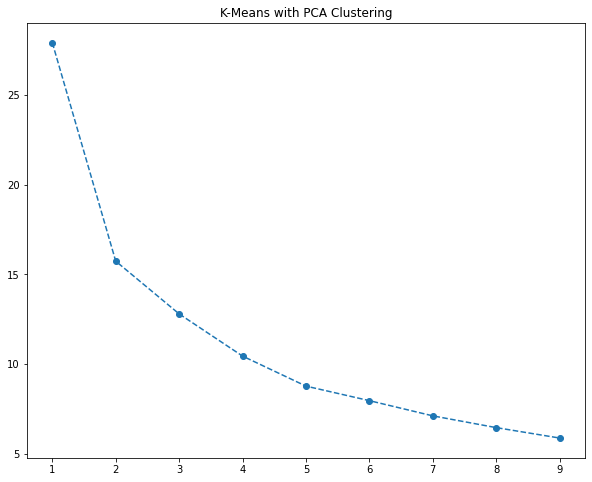

In [51]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), WCSS,marker = 'o', linestyle = '--')
plt.title('K-Means with PCA Clustering')
plt.show()

In [52]:
kmeans_pca = KMeans(n_clusters= 3 , init = 'k-means++',random_state=42 )
kmeans_pca.fit(scores_pca)


KMeans(n_clusters=3, random_state=42)

In [53]:
scores_pca = pd.DataFrame(scores_pca) 
overview_KMeans = pd.concat((overview_for_c.reset_index(drop = True) , scores_pca ), axis = 1)
overview_KMeans.columns.values[-3:] = ['pca1', 'pca2','pca3']
overview_KMeans['Group KMeans PCA'] = kmeans_pca.labels_
overview_KMeans  = pd.concat((names , overview_KMeans.reset_index(drop = True)  ), join = 'inner',axis = 1) 
overview_KMeans['player_name'] = overview_KMeans['player_name'].apply(lambda x : x.replace('_', " "))



In [54]:
overview_KMeans

,player_name,first_serve_percen,first_serve_pts_won_percen,second_serve_pts_won_percen,ace_percen,return_pts_won_percen,percen_unsafe_shots_made,percen_safe_shots_made,break_pts_percen,percen_err_returnable_made,...,deep_percen,very_deep_percen,err_net_percen,err_deep_percen,err_wide_percen,err_wide_deep_percen,pca1,pca2,pca3,Group KMeans PCA
0,Adrian_Mannarino,0.709162,0.681863,0.534258,0.104436,0.338361,0.194624,0.805376,0.105453,0.035706,...,0.734269,0.246669,0.004762,0.021927,0.009017,0.00000,-0.103691,-0.026227,0.110787,0
1,Albert_Montanes,0.631579,0.444444,0.333333,0.000000,0.392157,0.452830,0.547170,0.175439,0.025000,...,0.850000,0.500000,0.025000,0.000000,0.000000,0.00000,-0.636546,0.254509,-0.248483,1
2,Albert_Ramos,0.625082,0.667510,0.586321,0.012351,0.410467,0.241096,0.758904,0.085731,0.024752,...,0.696142,0.249403,0.009901,0.009901,0.004950,0.00000,-0.138618,-0.149597,0.073711,0
3,Alejandro_Davidovich_Fokina,0.683261,0.628955,0.365751,0.019703,0.375307,0.278689,0.721311,0.138341,0.044444,...,0.624346,0.262462,0.018687,0.017256,0.005461,0.00304,0.005312,0.020685,-0.083321,0
4,Aleksandar_Vukic,0.604208,0.698708,0.443229,0.031726,0.371921,0.268400,0.731600,0.105930,0.030299,...,0.691085,0.303736,0.008076,0.011822,0.010402,0.00000,-0.057365,0.103668,0.018225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Victor_Estrella,0.547170,0.586207,0.250000,0.018868,0.297872,0.230088,0.769912,0.150943,0.125000,...,0.500000,0.156250,0.062500,0.062500,0.000000,0.00000,0.143783,0.315949,-0.036417,0
209,Viktor_Durasovic,0.573643,0.540541,0.600000,0.031008,0.409524,0.238845,0.761155,0.178295,0.039474,...,0.776316,0.381579,0.013158,0.026316,0.000000,0.00000,-0.316243,-0.191783,0.004101,1
210,Viktor_Troicki,0.600000,0.740741,0.500000,0.133333,0.340426,0.358779,0.641221,0.100000,0.020000,...,0.640000,0.320000,0.000000,0.000000,0.020000,0.00000,-0.165036,-0.105629,-0.003430,1
211,Yannick_Hanfmann,0.678837,0.609665,0.560672,0.021616,0.361655,0.267902,0.732098,0.106673,0.022571,...,0.552220,0.180265,0.004831,0.012838,0.004902,0.00000,0.173115,0.067917,0.071552,0


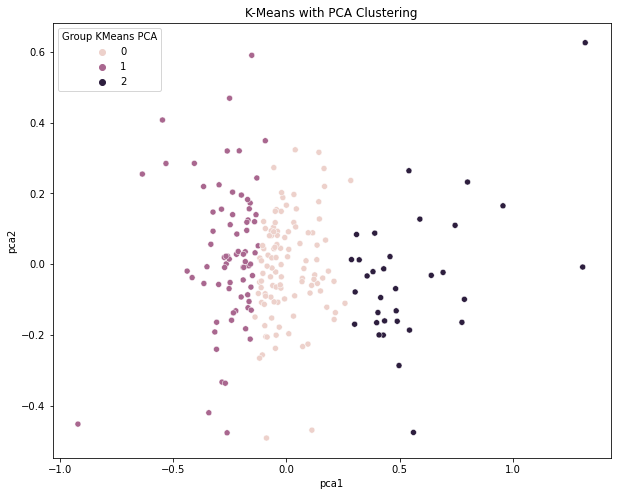

In [56]:
x_axis = overview_KMeans['pca1']
y_axis = overview_KMeans['pca2'] 
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis , y = y_axis , hue = 'Group KMeans PCA' , data = overview_KMeans )
plt.title('K-Means with PCA Clustering')
plt.show()

In [147]:
overview_KMeans_vis = overview_KMeans.drop(['pca1','pca2','pca3','player_name'], axis =1) 
overview_KMeans_vis 

,first_serve_percen,first_serve_pts_won_percen,second_serve_pts_won_percen,ace_percen,return_pts_won_percen,percen_unsafe_shots_made,percen_safe_shots_made,break_pts_percen,percen_err_returnable_made,percen_returnable_made,...,percen_unforced_fh_made,percen_unforced_bh_made,shallow_percen,deep_percen,very_deep_percen,err_net_percen,err_deep_percen,err_wide_percen,err_wide_deep_percen,Group KMeans PCA
0,0.709162,0.681863,0.534258,0.104436,0.338361,0.194624,0.805376,0.105453,0.035706,1.184512,...,0.281518,0.201881,0.203574,0.734269,0.246669,0.004762,0.021927,0.009017,0.00000,0
1,0.631579,0.444444,0.333333,0.000000,0.392157,0.452830,0.547170,0.175439,0.025000,1.625000,...,0.277778,0.166667,0.275000,0.850000,0.500000,0.025000,0.000000,0.000000,0.00000,1
2,0.625082,0.667510,0.586321,0.012351,0.410467,0.241096,0.758904,0.085731,0.024752,1.214749,...,0.326720,0.122134,0.269205,0.696142,0.249403,0.009901,0.009901,0.004950,0.00000,0
3,0.683261,0.628955,0.365751,0.019703,0.375307,0.278689,0.721311,0.138341,0.044444,1.091200,...,0.219221,0.242762,0.204392,0.624346,0.262462,0.018687,0.017256,0.005461,0.00304,0
4,0.604208,0.698708,0.443229,0.031726,0.371921,0.268400,0.731600,0.105930,0.030299,1.133008,...,0.278116,0.201546,0.138186,0.691085,0.303736,0.008076,0.011822,0.010402,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.547170,0.586207,0.250000,0.018868,0.297872,0.230088,0.769912,0.150943,0.125000,1.031250,...,0.177778,0.311111,0.375000,0.500000,0.156250,0.062500,0.062500,0.000000,0.00000,0
209,0.573643,0.540541,0.600000,0.031008,0.409524,0.238845,0.761155,0.178295,0.039474,1.342105,...,0.289157,0.204819,0.184211,0.776316,0.381579,0.013158,0.026316,0.000000,0.00000,1
210,0.600000,0.740741,0.500000,0.133333,0.340426,0.358779,0.641221,0.100000,0.020000,1.260000,...,0.312500,0.125000,0.300000,0.640000,0.320000,0.000000,0.000000,0.020000,0.00000,1
211,0.678837,0.609665,0.560672,0.021616,0.361655,0.267902,0.732098,0.106673,0.022571,0.962931,...,0.240296,0.238917,0.230446,0.552220,0.180265,0.004831,0.012838,0.004902,0.00000,0


In [ ]:
'percen_err_returnable_made','shallow_percen','deep_percen'

In [165]:
overview_KMeans_vis.drop(columns=['Group KMeans PCA']).columns.tolist()

['first_serve_percen',
 'first_serve_pts_won_percen',
 'second_serve_pts_won_percen',
 'ace_percen',
 'return_pts_won_percen',
 'percen_unsafe_shots_made',
 'percen_safe_shots_made',
 'break_pts_percen',
 'percen_err_returnable_made',
 'percen_returnable_made',
 'bp_pts_saved_percen',
 'percen_winners_fh_made',
 'percen_winners_bh_made',
 'percen_unforced_fh_made',
 'percen_unforced_bh_made',
 'shallow_percen',
 'deep_percen',
 'very_deep_percen',
 'err_net_percen',
 'err_deep_percen',
 'err_wide_percen',
 'err_wide_deep_percen']

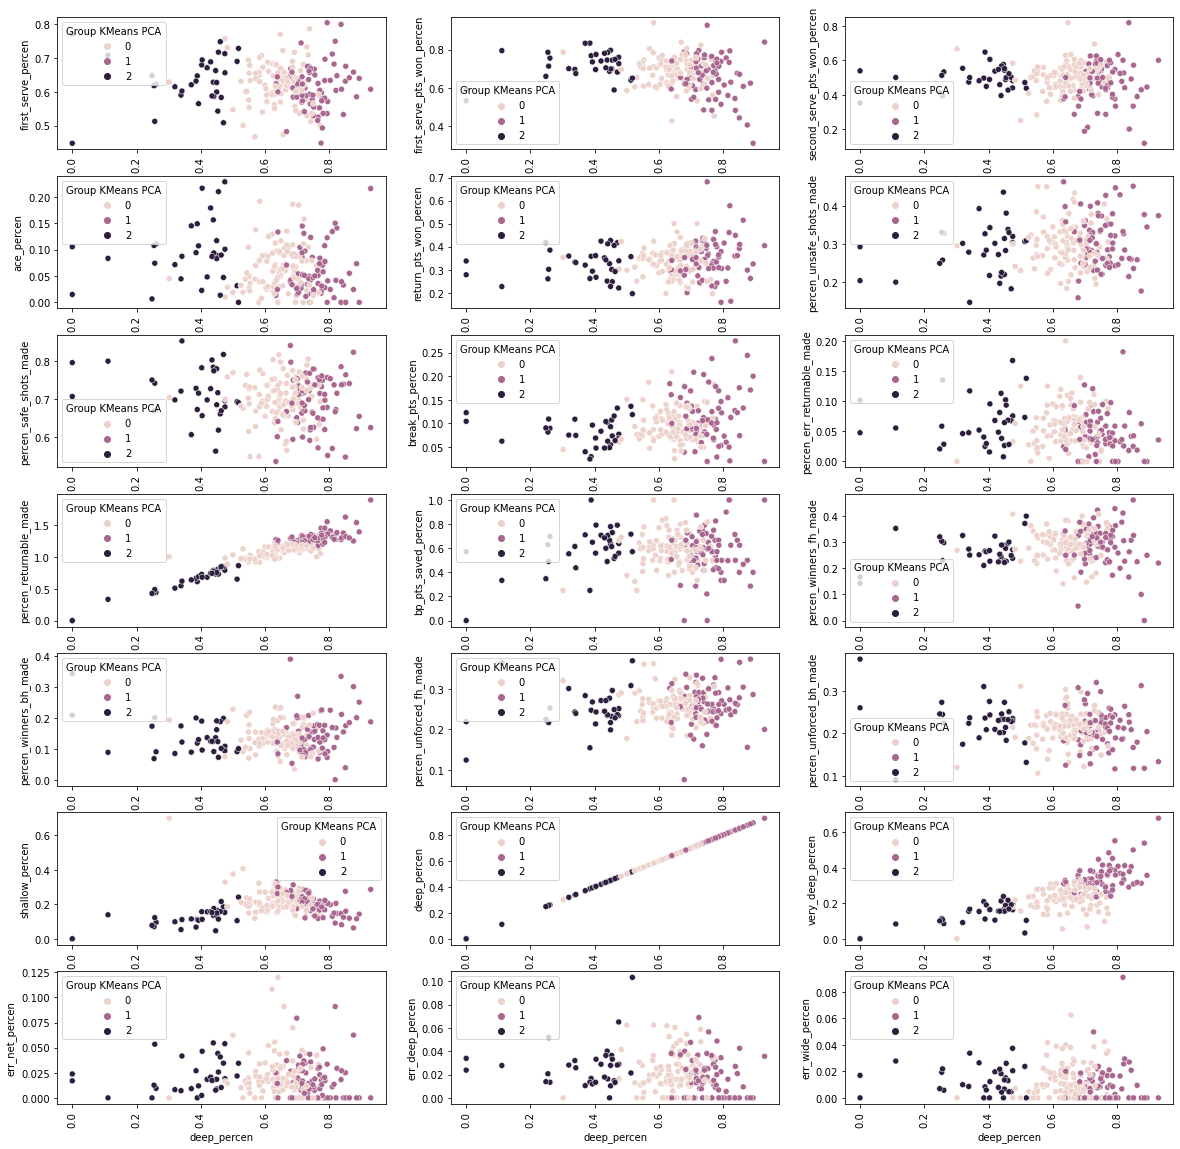

In [169]:
fig, ax = plt.subplots(7, 3, figsize=(20, 20))
selected_r = overview_KMeans_vis.drop(columns=['Group KMeans PCA']).columns.tolist()
for variable, subplot in zip(selected_r, ax.flatten()):
    sns.scatterplot( x= 'deep_percen' , y = variable, hue = 'Group KMeans PCA' ,  data = overview_KMeans_vis,  ax=subplot)
    for label in subplot.get_xticklabels():
        plt.xlabel('deep_percen')
        # plt.ylabel('sccater');
        label.set_rotation(90);

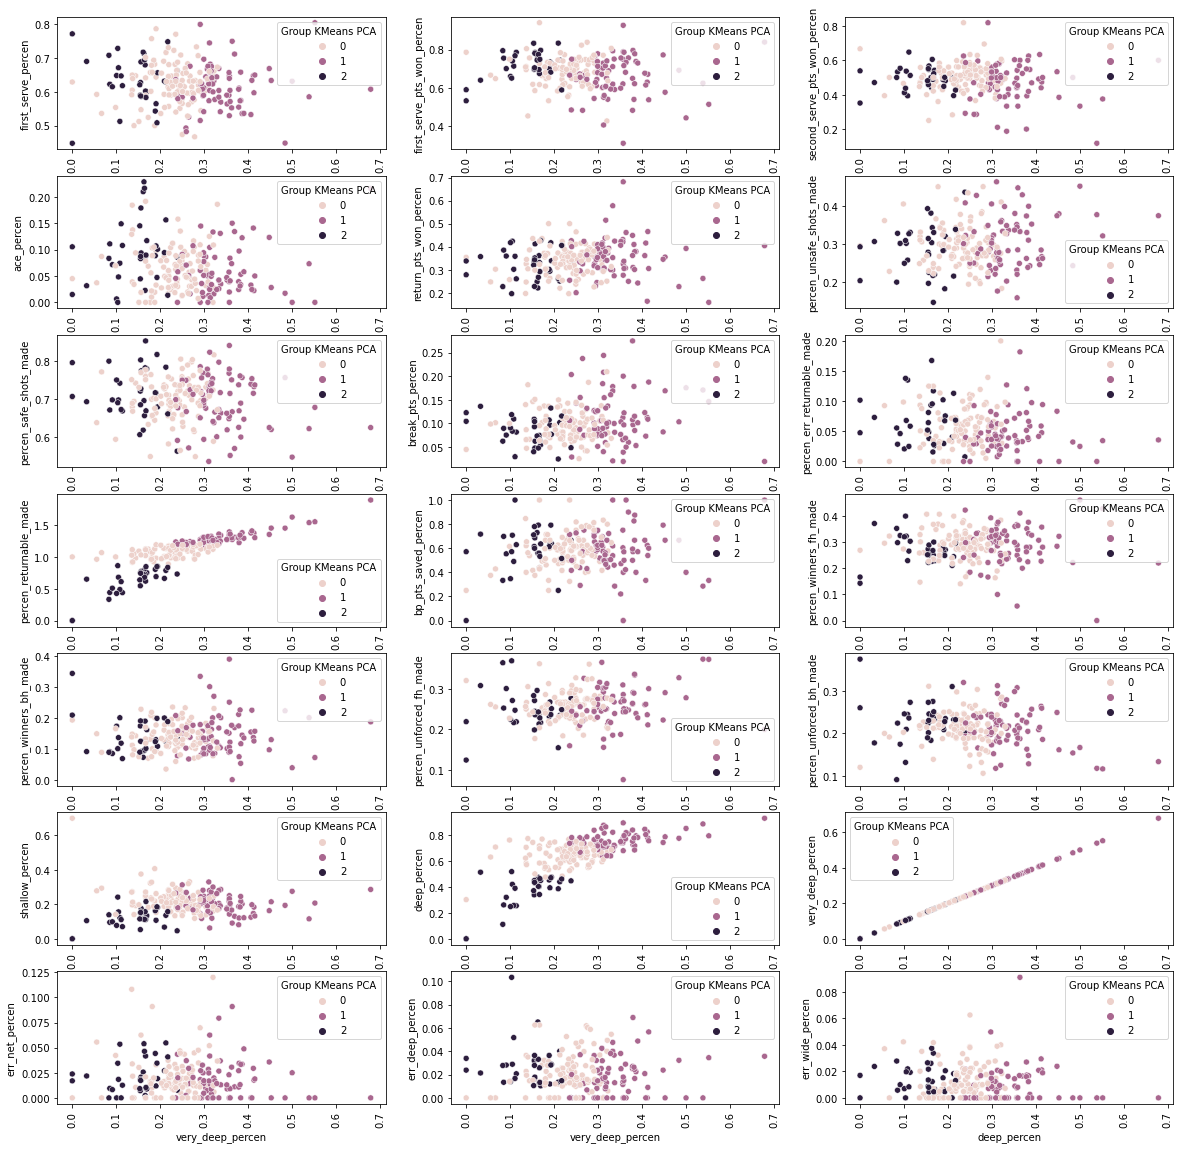

In [170]:
fig, ax = plt.subplots(7, 3, figsize=(20, 20))
selected_r = overview_KMeans_vis.drop(columns=['Group KMeans PCA']).columns.tolist()
for variable, subplot in zip(selected_r, ax.flatten()):
    sns.scatterplot( x= 'very_deep_percen' , y = variable, hue = 'Group KMeans PCA' ,  data = overview_KMeans_vis,  ax=subplot)
    for label in subplot.get_xticklabels():
        plt.xlabel('very_deep_percen')
        # plt.ylabel('sccater');
        label.set_rotation(90);

In [144]:
overview_KMeans

,player_name,first_serve_percen,first_serve_pts_won_percen,second_serve_pts_won_percen,ace_percen,return_pts_won_percen,percen_unsafe_shots_made,percen_safe_shots_made,break_pts_percen,percen_err_returnable_made,...,deep_percen,very_deep_percen,err_net_percen,err_deep_percen,err_wide_percen,err_wide_deep_percen,pca1,pca2,pca3,Group KMeans PCA
0,Adrian Mannarino,0.709162,0.681863,0.534258,0.104436,0.338361,0.194624,0.805376,0.105453,0.035706,...,0.734269,0.246669,0.004762,0.021927,0.009017,0.00000,-0.103691,-0.026227,0.110787,0
1,Albert Montanes,0.631579,0.444444,0.333333,0.000000,0.392157,0.452830,0.547170,0.175439,0.025000,...,0.850000,0.500000,0.025000,0.000000,0.000000,0.00000,-0.636546,0.254509,-0.248483,1
2,Albert Ramos,0.625082,0.667510,0.586321,0.012351,0.410467,0.241096,0.758904,0.085731,0.024752,...,0.696142,0.249403,0.009901,0.009901,0.004950,0.00000,-0.138618,-0.149597,0.073711,0
3,Alejandro Davidovich Fokina,0.683261,0.628955,0.365751,0.019703,0.375307,0.278689,0.721311,0.138341,0.044444,...,0.624346,0.262462,0.018687,0.017256,0.005461,0.00304,0.005312,0.020685,-0.083321,0
4,Aleksandar Vukic,0.604208,0.698708,0.443229,0.031726,0.371921,0.268400,0.731600,0.105930,0.030299,...,0.691085,0.303736,0.008076,0.011822,0.010402,0.00000,-0.057365,0.103668,0.018225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Victor Estrella,0.547170,0.586207,0.250000,0.018868,0.297872,0.230088,0.769912,0.150943,0.125000,...,0.500000,0.156250,0.062500,0.062500,0.000000,0.00000,0.143783,0.315949,-0.036417,0
209,Viktor Durasovic,0.573643,0.540541,0.600000,0.031008,0.409524,0.238845,0.761155,0.178295,0.039474,...,0.776316,0.381579,0.013158,0.026316,0.000000,0.00000,-0.316243,-0.191783,0.004101,1
210,Viktor Troicki,0.600000,0.740741,0.500000,0.133333,0.340426,0.358779,0.641221,0.100000,0.020000,...,0.640000,0.320000,0.000000,0.000000,0.020000,0.00000,-0.165036,-0.105629,-0.003430,1
211,Yannick Hanfmann,0.678837,0.609665,0.560672,0.021616,0.361655,0.267902,0.732098,0.106673,0.022571,...,0.552220,0.180265,0.004831,0.012838,0.004902,0.00000,0.173115,0.067917,0.071552,0


In [124]:
# print(list(overview_KMeans['player_name']))
# print(list(full_data['FirstPlayer_name'].unique() )) 
l1 = dict(zip(list(overview_KMeans['player_name']),list(overview_KMeans['Group KMeans PCA'])))
l2 = list(full_data['SecondPlayer__name'].unique() ) +  list(full_data['FirstPlayer_name'].unique() )
main_list = np.setdiff1d(l1,l2)


In [125]:
# cl = [] 
# for i in len(full_data) : 
#     if full_data['SecondPlayer__name'][i] in l1.keys() : 
label_data  = pd.DataFrame(list(l1.items()), columns = ['FirstPlayer_name','cluster'])
label_data
cluster_data  = pd.merge(full_data,
                       label_data,
                       on=['FirstPlayer_name'],
                       how="left")
cluster_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 88 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tourney_id                       648 non-null    object 
 1   tourney_name                     648 non-null    object 
 2   surface                          648 non-null    object 
 3   draw_size                        648 non-null    float64
 4   tourney_level                    648 non-null    object 
 5   tourney_date                     648 non-null    float64
 6   match_num                        648 non-null    float64
 7   FirstPlayer_id                   648 non-null    float64
 8   FirstPlayer_seed                 436 non-null    object 
 9   FirstPlayer_entry                66 non-null     object 
 10  FirstPlayer_name                 648 non-null    object 
 11  FirstPlayer_hand                 648 non-null    object 
 12  FirstPlayer_ht        

In [126]:
# .info()
l3 = list(overview_KMeans['player_name'])

null_rows = cluster_data.loc[~cluster_data['cluster'].notnull()]
l4 = list(null_rows['SecondPlayer__name']) 
display(null_rows['SecondPlayer__name'])

215      Jordan Thompson
216       Alex De Minaur
217    Fernando Verdasco
Name: SecondPlayer__name, dtype: object

In [127]:
overview_KMeans.loc[overview_KMeans['player_name'].isin(l4)]


,player_name,first_serve_percen,first_serve_pts_won_percen,second_serve_pts_won_percen,ace_percen,return_pts_won_percen,percen_unsafe_shots_made,percen_safe_shots_made,break_pts_percen,percen_err_returnable_made,...,deep_percen,very_deep_percen,err_net_percen,err_deep_percen,err_wide_percen,err_wide_deep_percen,pca1,pca2,pca3,Group KMeans PCA
5,Alex De Minaur,0.744966,0.729730,0.578947,0.026846,0.341935,0.286201,0.713799,0.040268,0.008000,...,0.712000,0.312000,0.008000,0.000000,0.0,0.0,-0.220483,0.027824,0.123102,1
62,Fernando Verdasco,0.631944,0.833215,0.496316,0.094246,0.261478,0.271636,0.728364,0.024802,0.040541,...,0.385135,0.209459,0.027027,0.013514,0.0,0.0,0.541649,0.263833,0.132537,2
105,Jordan Thompson,0.658228,0.673077,0.555556,0.088608,0.304348,0.342975,0.657025,0.088608,0.113636,...,0.659091,0.181818,0.090909,0.022727,0.0,0.0,0.031416,-0.147009,-0.028894,0


In [128]:
cluster_data.iloc[215,87] = 0   
cluster_data.iloc[216,87] = 1
cluster_data.iloc[217,87] = 2 


In [130]:
top_cluster_data = cluster_data.loc[ (cluster_data['FirstPlayer_rank'] < 20) | (cluster_data['SecondPlayer__rank'] < 20) , :]


In [197]:
cluster_data_temp = cluster_data.groupby(['FirstPlayer_name'])[cluster_data.columns.tolist()[1:]].agg('max')
c_names = cluster_data_temp.columns.tolist()
cluster_data_temp = cluster_data_temp.rename_axis(c_names.insert(0, 'player_name')).reset_index()
cluster_data_temp.rename(columns={'index': 'player_name'}, inplace=True)
display(cluster_data_temp)


/opt/conda/lib/python3.9/site-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  return f(*args, **kwargs)


,player_name,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,FirstPlayer_id,FirstPlayer_name,FirstPlayer_hand,...,sp_return_depth_err_deep,sp_return_depth_err_wide,sp_return_depth_wide_deep,sp_shot_Direction_crosscourt,sp_shot_Direction_down_middle,sp_shot_Direction_down_the_line,sp_shot_Direction_inside_out,sp_shot_Direction_inside_in,label,cluster
0,Adrian Mannarino,Moscow,Hard,32.0,A,20181015.0,293.0,105173.0,Adrian Mannarino,L,...,1.0,1.0,0.0,21.0,23.0,5.0,15.0,0.0,0.0,0.0
1,Albert Ramos,Indian Wells Masters,Hard,128.0,M,20190304.0,266.0,105077.0,Albert Ramos,L,...,1.0,0.0,0.0,54.0,31.0,23.0,14.0,4.0,0.0,0.0
2,Alejandro Davidovich Fokina,Rome Masters,Clay,128.0,M,20220411.0,299.0,200221.0,Alejandro Davidovich Fokina,R,...,2.0,1.0,0.0,214.0,109.0,71.0,84.0,21.0,0.0,0.0
3,Alex De Minaur,Tokyo,Hard,128.0,G,20220117.0,300.0,200282.0,Alex De Minaur,R,...,2.0,1.0,0.0,292.0,210.0,59.0,70.0,10.0,1.0,1.0
4,Alex Molcan,Australian Open,Hard,128.0,G,20220117.0,132.0,144684.0,Alex Molcan,L,...,0.0,1.0,0.0,287.0,134.0,83.0,94.0,6.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Tommy Robredo,Monte Carlo Masters,Clay,56.0,M,20150412.0,16.0,103990.0,Tommy Robredo,R,...,0.0,1.0,0.0,100.0,43.0,47.0,41.0,6.0,1.0,1.0
135,Ugo Humbert,Marseille,Hard,32.0,A,20190218.0,294.0,200005.0,Ugo Humbert,L,...,0.0,0.0,0.0,44.0,43.0,9.0,19.0,1.0,1.0,1.0
136,Victor Estrella,Quito,Clay,32.0,A,20160201.0,277.0,103607.0,Victor Estrella,R,...,1.0,2.0,0.0,48.0,54.0,8.0,22.0,0.0,0.0,0.0
137,Viktor Troicki,Sydney,Hard,32.0,A,20160111.0,300.0,104678.0,Viktor Troicki,R,...,0.0,1.0,0.0,147.0,194.0,37.0,68.0,11.0,1.0,1.0


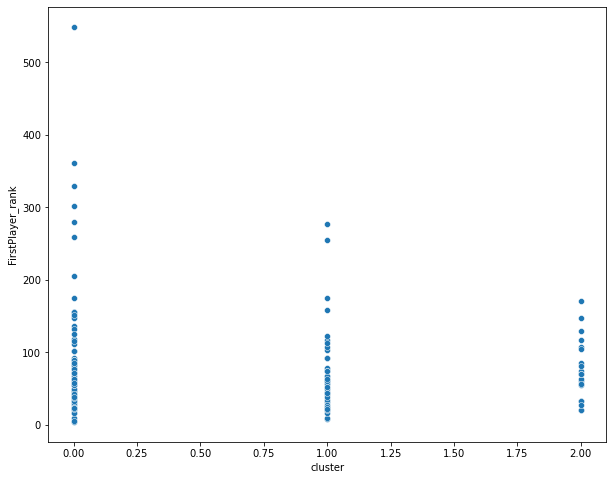

In [199]:
plt.figure(figsize = (10,8))
sns.scatterplot( x = 'cluster' , y = 'FirstPlayer_rank' , data = cluster_data_temp )
plt.show()

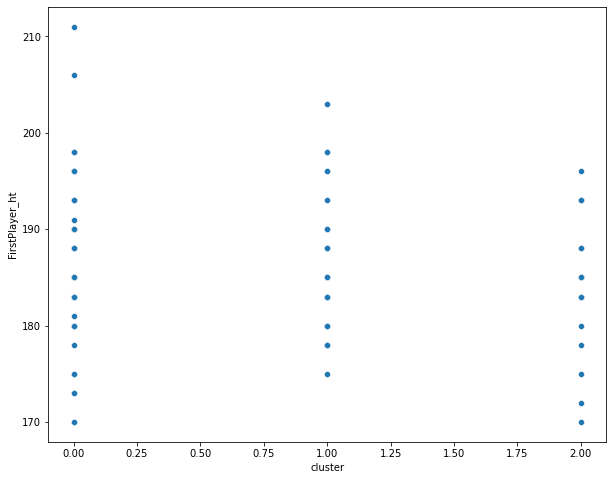

In [198]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'cluster' , y = 'FirstPlayer_ht' , data = cluster_data )
plt.show()

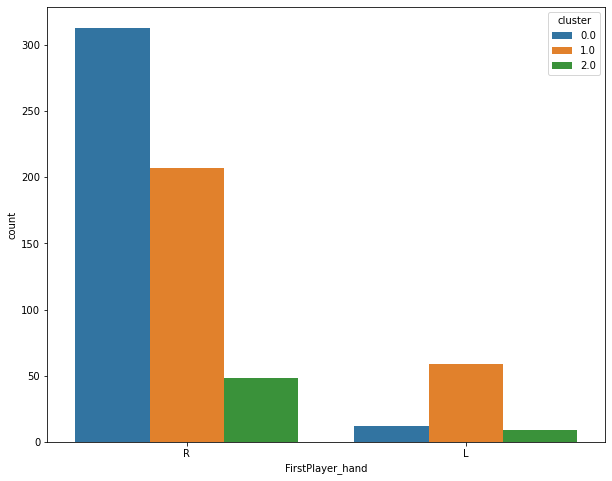

In [139]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'FirstPlayer_hand' , hue = 'cluster' , data = cluster_data )
plt.show()

## ML

In [218]:
class_data = full_data.drop(['tourney_id','tourney_name','tourney_date','match_num','FirstPlayer_id','FirstPlayer_seed',
'FirstPlayer_entry','FirstPlayer_name','SecondPlayer__id','SecondPlayer__seed','SecondPlayer__entry','SecondPlayer__name',
'match_id','FirstPlayer_ioc','SecondPlayer__ioc','score','round','FirstPlayer_rank_points','SecondPlayer__rank_points'] , axis =1)
cluster_class_data = cluster_data.drop(['tourney_id','tourney_name','tourney_date','match_num','FirstPlayer_id','FirstPlayer_seed',
'FirstPlayer_entry','FirstPlayer_name','SecondPlayer__id','SecondPlayer__seed','SecondPlayer__entry','SecondPlayer__name',
'match_id','FirstPlayer_ioc','SecondPlayer__ioc','score','round','FirstPlayer_rank_points','SecondPlayer__rank_points'] , axis =1)

In [203]:
le = preprocessing.LabelEncoder()
for i in class_data.columns.tolist():
    class_data[i]= le.fit_transform(class_data[i])
class_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,FirstPlayer_id,FirstPlayer_seed,FirstPlayer_entry,...,sp_return_depth_err_net,sp_return_depth_err_deep,sp_return_depth_err_wide,sp_return_depth_wide_deep,sp_shot_Direction_crosscourt,sp_shot_Direction_down_middle,sp_shot_Direction_down_the_line,sp_shot_Direction_inside_out,sp_shot_Direction_inside_in,label
0,2007-352,Paris Masters,Hard,48.0,M,20071028.0,47.0,103900.0,NaN,NaN,...,0.0,1.0,0.0,0.0,65.0,29.0,22.0,17.0,2.0,0.0
1,2010-540,Wimbledon,Grass,128.0,G,20100621.0,127.0,104745.0,2.0,NaN,...,0.0,1.0,0.0,0.0,77.0,45.0,21.0,34.0,4.0,0.0
2,2011-495,Dubai,Hard,32.0,A,20110221.0,31.0,104925.0,2.0,NaN,...,0.0,1.0,0.0,0.0,55.0,34.0,15.0,30.0,3.0,0.0
3,2011-520,Roland Garros,Clay,128.0,G,20110522.0,127.0,104745.0,1.0,NaN,...,1.0,3.0,2.0,0.0,163.0,104.0,56.0,63.0,8.0,0.0
4,2012-410,Monte Carlo Masters,Clay,56.0,M,20120415.0,55.0,104745.0,2.0,NaN,...,0.0,1.0,0.0,0.0,63.0,66.0,20.0,46.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2022-0322,Geneva,Clay,32.0,A,20220516.0,286.0,134770.0,2,NaN,...,5.0,1.0,0.0,0.0,24.0,31.0,3.0,20.0,0.0,1.0
2537,2022-0403,Miami Masters,Hard,128.0,M,20220321.0,246.0,207678.0,NaN,NaN,...,0.0,1.0,0.0,1.0,104.0,57.0,31.0,37.0,3.0,1.0
2560,2022-0440,s Hertogenbosch,Grass,32.0,A,20220606.0,295.0,126646.0,NaN,WC,...,1.0,0.0,2.0,0.0,35.0,24.0,14.0,10.0,1.0,1.0
2577,2022-540,Wimbledon,Grass,128.0,G,20220627.0,212.0,104925.0,1,NaN,...,4.0,2.0,1.0,0.0,124.0,73.0,30.0,25.0,5.0,1.0


In [ ]:
le = preprocessing.LabelEncoder()
data_en = data
for i in data_en.columns.tolist():
    data_en[i]= le.fit_transform(data_en[i])
data_en.head()

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")